In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score,StratifiedKFold,train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer as SI
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [192]:
train_df=pd.read_csv(r"C:\Users\EVANS\OneDrive\Desktop\python\Titanic\train.csv")
test_df=pd.read_csv(r"C:\Users\EVANS\OneDrive\Desktop\python\Titanic\test.csv")

In [193]:
train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [194]:
test_df.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [195]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [196]:
test_df.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [197]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [198]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [199]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [200]:
train_df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [201]:
train_df.groupby(["Pclass"])["Survived"].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [202]:
#Survial of each gender in every Pasenger Class
train_df.groupby(["Pclass","Sex"])["Survived"].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: count, dtype: int64

In [203]:
train_df.groupby(["Age","Sex"])["Survived"].value_counts()

Age    Sex     Survived
0.42   male    1           1
0.67   male    1           1
0.75   female  1           2
0.83   male    1           2
0.92   male    1           1
                          ..
70.00  male    0           2
70.50  male    0           1
71.00  male    0           2
74.00  male    0           1
80.00  male    1           1
Name: count, Length: 216, dtype: int64

In [204]:
train_df.groupby(["Sex"])["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [205]:
train_df["Family_size"]=train_df["SibSp"]+train_df["Parch"]+1
test_df["Family_size"]=test_df["SibSp"]+test_df["Parch"]+1

In [206]:
train_df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S,1
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S,3
447,448,1,1,"Seward, Mr. Frederic Kimber",male,34.0,0,0,113794,26.5500,NaN,S,1
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C,1


In [207]:
train_df.groupby(["Family_size"])["Survived"].mean()

Family_size
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [208]:
family_map = {1: 'Alone', 2: 'Nuclear_family', 3: 'Small_family', 4: 'Small_family', 5: 'Medium_family', 6: 'Medium_family', 7: 'Large_family', 8: 'Large_family', 11: 'Large_family'}
train_df['Family_Size_Grouped'] = train_df['Family_size'].map(family_map)
test_df['Family_Size_Grouped'] = train_df['Family_size'].map(family_map)

In [209]:
train_df.groupby(["Family_Size_Grouped"])["Survived"].mean()

Family_Size_Grouped
Alone             0.303538
Large_family      0.160000
Medium_family     0.162162
Nuclear_family    0.552795
Small_family      0.610687
Name: Survived, dtype: float64

Text(0, 0.5, 'Frequency')

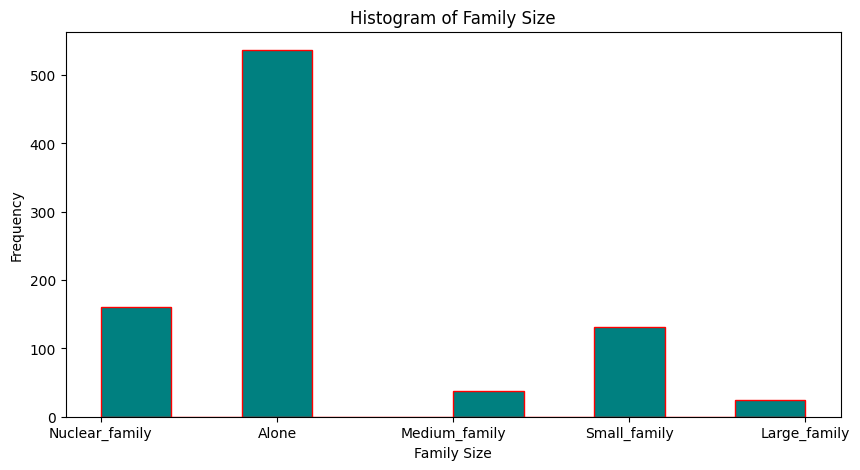

In [210]:
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(train_df['Family_Size_Grouped'], edgecolor='red', color='teal')
plt.title('Histogram of Family Size')
plt.xlabel('Family Size')
plt.ylabel('Frequency')


In [211]:
age_group=[]
for i in train_df["Age"]:
    if i<=10:
        age_group.append("Child")
    elif i>10 and i<18:
        age_group.append("Youth")
    elif i>17 and i<=60:
    
        age_group.append("Adult")
    else:
    
        age_group.append("Elderly")

train_df["Age_group"]=age_group

In [212]:
train_df["Age_group"].value_counts()

Age_group
Adult      579
Elderly    199
Child       64
Youth       49
Name: count, dtype: int64

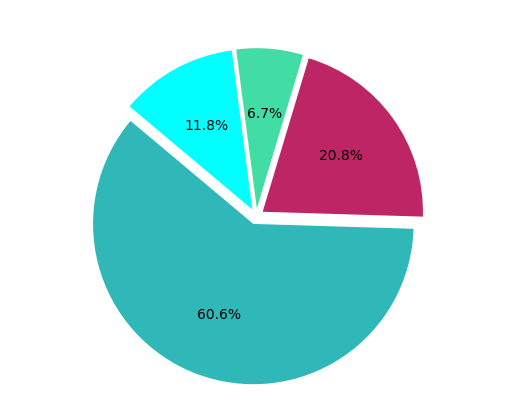

Text(0.5, 1.0, 'Age Category')

In [213]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('none')  
#ax.set_facecolor('none')
labels = ['Adult', 'Elderly',"Child","Youth"]
sizes = [579, 199,64,113]
explode = (0.05, 0.05,0.05,0.05)
clours=['#30b7b7', '#BE2564', '#41dda4',"cyan"]
wedges, texts, autotexts =ax.pie(sizes, explode=explode,colors=clours, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
ax.set_title('Age Category', color='white')
plt.title('Age Category',color="white")
plt.show()
for text, autotext in zip(texts, autotexts):
    text.set_color('white')
    autotext.set_color('white')

ax.set_title('Age Category', color='white')

Text(0.5, 1.0, 'Age Category')

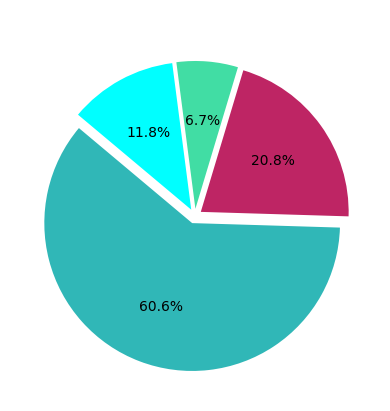

In [214]:
labels = ['Adult', 'Elderly', 'Child', 'Youth']
sizes = [579, 199, 64, 113]
explode = (0.05, 0.05, 0.05, 0.05)
colors = ['#30b7b7', '#BE2564', '#41dda4', 'cyan']

fig, ax = plt.subplots()
fig.patch.set_facecolor('none')  # Set transparent background for the figure

# Create the pie chart
wedges, texts, autotexts = ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Customize labels and title
for text, autotext in zip(texts, autotexts):
    text.set_color('white')
ax.set_title('Age Category', color='white')

In [215]:
train_df.groupby(["Embarked"])["Survived"].mean()


Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [216]:
train_df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

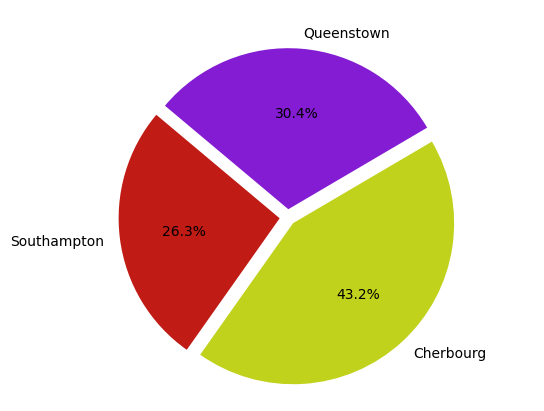

In [217]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('none')  
ax.set_facecolor('none') 
labels = ['Southampton', 'Cherbourg',"Queenstown"]
sizes = [0.336957, 0.553571,0.389610]
explode = (0.05, 0.05,0.05)
clours=['#c01b14', '#c1d21c', '#831cd2']
plt.pie(sizes, explode=explode, labels=labels,colors=clours, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Survial based on Port',color="white")
plt.show()

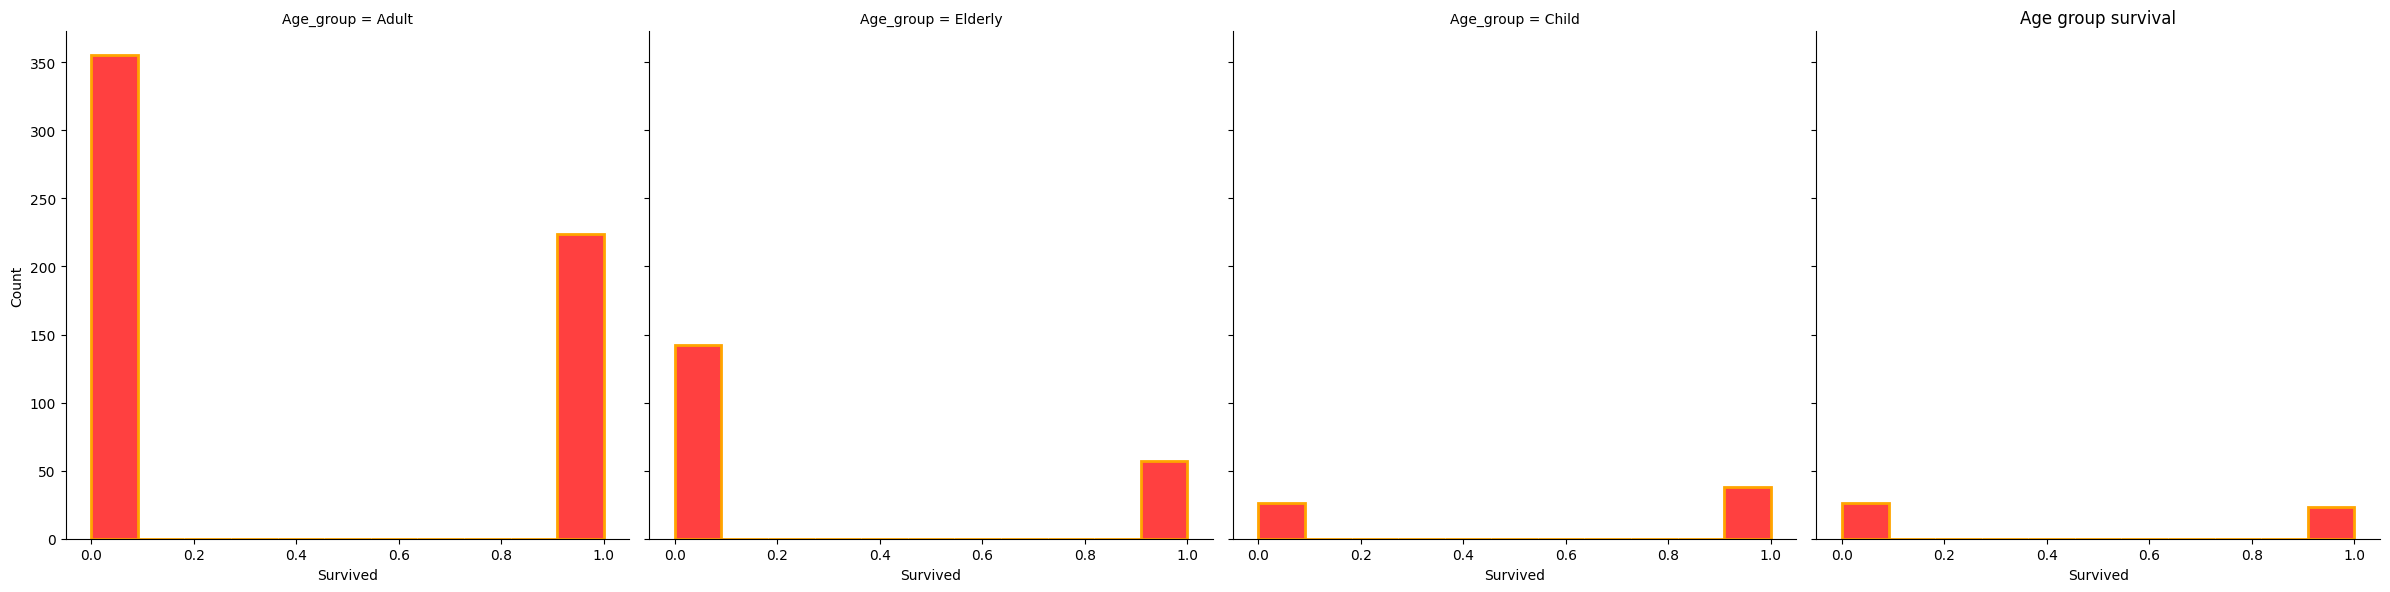

In [218]:
sns.displot(train_df, x="Survived", col="Age_group", height=6,color='red', edgecolor='orange', linewidth=2)
plt.title("Age group survival");

In [219]:
train_df['Age_Cut'] = pd.qcut(train_df['Age'], 8)
test_df['Age_Cut'] = pd.qcut(test_df['Age'], 8)
 

In [220]:
train_df.groupby(["Age_Cut"])["Survived"].mean()

C:\Users\EVANS\AppData\Local\Temp\ipykernel_25608\3919420655.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(["Age_Cut"])["Survived"].mean()


Age_Cut
(0.419, 16.0]     0.550000
(16.0, 20.125]    0.341772
(20.125, 24.0]    0.367347
(24.0, 28.0]      0.352941
(28.0, 32.312]    0.416667
(32.312, 38.0]    0.450549
(38.0, 47.0]      0.329545
(47.0, 80.0]      0.415730
Name: Survived, dtype: float64

In [221]:
train_df.loc[train_df['Age'] <= 19, 'Age'] = 0
train_df.loc[(train_df['Age'] > 19) & (train_df['Age'] <= 25), 'Age'] = 1
train_df.loc[(train_df['Age'] > 25) & (train_df['Age'] <= 31.8), 'Age'] = 2
train_df.loc[(train_df['Age'] > 31.8) & (train_df['Age'] <= 41), 'Age'] = 3
train_df.loc[(train_df['Age'] > 41) & (train_df['Age'] <= 80), 'Age'] = 4
train_df.loc[train_df['Age'] > 80, 'Age'] 

test_df.loc[test_df['Age'] <= 19, 'Age'] = 0
test_df.loc[(test_df['Age'] > 19) & (test_df['Age'] <= 25), 'Age'] = 1
test_df.loc[(test_df['Age'] > 25) & (test_df['Age'] <= 31.8), 'Age'] = 2
test_df.loc[(test_df['Age'] > 31.8) & (test_df['Age'] <= 41), 'Age'] = 3
test_df.loc[(test_df['Age'] > 41) & (test_df['Age'] <= 80), 'Age'] = 4
test_df.loc[test_df['Age'] > 80, 'Age'] 

Series([], Name: Age, dtype: float64)

In [222]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_Size_Grouped,Age_group,Age_Cut
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,2,Nuclear_family,Adult,"(20.125, 24.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,2,Nuclear_family,Adult,"(32.312, 38.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Alone,Adult,"(24.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,2,Nuclear_family,Adult,"(32.312, 38.0]"
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,1,Alone,Adult,"(32.312, 38.0]"


In [223]:
train_df['Fare_Cut'] = pd.qcut(train_df['Fare'], 8)
test_df['Fare_Cut'] = pd.qcut(test_df['Fare'], 8)

In [224]:
train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()

C:\Users\EVANS\AppData\Local\Temp\ipykernel_25608\1994933730.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Fare_Cut'], as_index=False)['Survived'].mean()


,Fare_Cut,Survived
0,"(-0.001, 7.75]",0.207143
1,"(7.75, 7.91]",0.180723
2,"(7.91, 9.841]",0.198198
3,"(9.841, 14.454]",0.407080
4,"(14.454, 24.479]",0.436364
5,"(24.479, 31.0]",0.473214
6,"(31.0, 69.488]",0.481818
7,"(69.488, 512.329]",0.678571


In [225]:
train_df.loc[train_df['Fare'] <= 7.854, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.854) & (train_df['Fare'] <= 10.5), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 10.5) & (train_df['Fare'] <= 21.679), 'Fare'] = 2
train_df.loc[(train_df['Fare'] > 21.679) & (train_df['Fare'] <= 39.688), 'Fare'] = 3
train_df.loc[(train_df['Fare'] > 39.688) & (train_df['Fare'] <= 512.329), 'Fare'] = 4
train_df.loc[train_df['Fare'] > 512.329, 'Fare'] 

test_df.loc[test_df['Fare'] <= 7.854, 'Fare'] = 0
test_df.loc[(test_df['Fare'] > 7.854) & (test_df['Fare'] <= 10.5), 'Fare'] = 1
test_df.loc[(test_df['Fare'] > 10.5) & (test_df['Fare'] <= 21.679), 'Fare'] = 2
test_df.loc[(test_df['Fare'] > 21.679) & (test_df['Fare'] <= 39.688), 'Fare'] = 3
test_df.loc[(test_df['Fare'] > 39.688) & (test_df['Fare'] <= 512.329), 'Fare'] = 4
test_df.loc[test_df['Fare'] > 512.329, 'Fare']

343    512.3292
Name: Fare, dtype: float64

In [226]:
train_df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [227]:
train_df['Title'] = train_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())
test_df['Title'] = test_df['Name'].str.split(pat= ",", expand=True)[1].str.split(pat= ".", expand=True)[0].apply(lambda x: x.strip())

In [228]:
train_df.groupby(['Title'], as_index=False)['Survived'].mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Don,0.000000
3,Dr,0.428571
4,Jonkheer,0.000000
5,Lady,1.000000
6,Major,0.500000
7,Master,0.575000
8,Miss,0.697802
9,Mlle,1.000000


In [229]:
train_df['Title'] = train_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

test_df['Title'] = test_df['Title'].replace({
    'Capt': 'Military',
    'Col': 'Military',
    'Major': 'Military',
    'Jonkheer': 'Noble',
    'the Countess': 'Noble',
    'Don': 'Noble',
    'Lady': 'Noble',
    'Sir': 'Noble',
    'Mlle': 'Noble',
    'Ms': 'Noble',
    'Mme': 'Noble'    
})

In [230]:
train_df['Name_Length'] = train_df['Name'].apply(lambda x: len(x))
test_df['Name_Length'] = test_df['Name'].apply(lambda x: len(x))

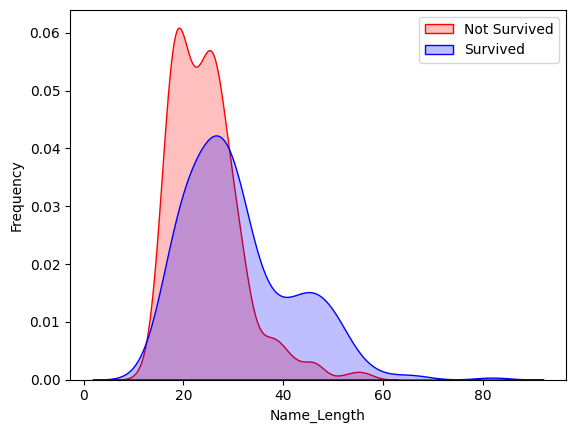

In [231]:
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==0) & (train_df['Name_Length'].notnull())], color='Red', fill=True)
g = sns.kdeplot(train_df['Name_Length'][(train_df['Survived']==1) & (train_df['Name_Length'].notnull())], ax=g, color='Blue', fill=True)
g.set_xlabel('Name_Length')
g.set_ylabel('Frequency')
g = g.legend(['Not Survived', 'Survived'])

In [232]:
train_df['Name_LengthGB'] = pd.qcut(train_df['Name_Length'], 3)
test_df['Name_LengthGB'] = pd.qcut(test_df['Name_Length'], 3)

In [233]:
train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()

C:\Users\EVANS\AppData\Local\Temp\ipykernel_25608\554738133.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Name_LengthGB'], as_index=False)['Survived'].mean()


,Name_LengthGB,Survived
0,"(11.999, 22.0]",0.252336
1,"(22.0, 28.0]",0.322581
2,"(28.0, 82.0]",0.587629


In [234]:
train_df.loc[train_df['Name_Length'] <= 22, 'Name_Size'] = 0
train_df.loc[(train_df['Name_Length'] > 22) & (train_df['Name_Length'] <= 28), 'Name_Size'] = 1
train_df.loc[(train_df['Name_Length'] > 28) & (train_df['Name_Length'] <= 82), 'Name_Size'] = 2
train_df.loc[train_df['Name_Length'] > 82, 'Name_Size'] 

test_df.loc[test_df['Name_Length'] <= 22, 'Name_Size'] = 0
test_df.loc[(test_df['Name_Length'] > 22) & (test_df['Name_Length'] <= 28), 'Name_Size'] = 1
test_df.loc[(test_df['Name_Length'] > 28) & (test_df['Name_Length'] <= 82), 'Name_Size'] = 2
test_df.loc[test_df['Name_Length'] > 82, 'Name_Size']

Series([], Name: Name_Size, dtype: float64)

In [235]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked,Family_size,Family_Size_Grouped,Age_group,Age_Cut,Fare_Cut,Title,Name_Length,Name_LengthGB,Name_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,0.0,...,S,2,Nuclear_family,Adult,"(20.125, 24.0]","(-0.001, 7.75]",Mr,23,"(22.0, 28.0]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,4.0,...,C,2,Nuclear_family,Adult,"(32.312, 38.0]","(69.488, 512.329]",Mrs,51,"(28.0, 82.0]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,1.0,...,S,1,Alone,Adult,"(24.0, 28.0]","(7.91, 9.841]",Miss,22,"(11.999, 22.0]",0.0


In [236]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [237]:
train_df['TicketNumber'] = train_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))
test_df['TicketNumber'] = test_df['Ticket'].apply(lambda x: pd.Series({'Ticket': x.split()[-1]}))

In [238]:
train_df.groupby(['TicketNumber'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumber,count,mean
464,347082,7,0.000000
196,2343,7,0.000000
94,1601,7,0.714286
168,2144,6,0.000000
468,347088,6,0.000000
...,...,...,...
271,2662,1,0.000000
272,2663,1,1.000000
273,2664,1,0.000000
276,2667,1,1.000000


In [239]:
train_df.groupby('TicketNumber')['TicketNumber'].transform('count')

0      1
1      1
2      1
3      2
4      1
      ..
886    1
887    1
888    2
889    1
890    1
Name: TicketNumber, Length: 891, dtype: int64

In [240]:
train_df['TicketNumberCounts'] = train_df.groupby('TicketNumber')['TicketNumber'].transform('count')
test_df['TicketNumberCounts'] = test_df.groupby('TicketNumber')['TicketNumber'].transform('count')

In [241]:
train_df.groupby(['TicketNumberCounts'], as_index=False)['Survived'].agg(['count', 'mean']).sort_values('count', ascending=False)

,TicketNumberCounts,count,mean
0,1,544,0.295956
1,2,188,0.569149
2,3,66,0.712121
3,4,44,0.500000
6,7,21,0.238095
5,6,18,0.000000
4,5,10,0.000000


In [242]:
train_df['Ticket'].str.split(pat=" ", expand=True)

,0,1,2
0,A/5,21171,None
1,PC,17599,None
2,STON/O2.,3101282,None
3,113803,None,None
4,373450,None,None
...,...,...,...
886,211536,None,None
887,112053,None,None
888,W./C.,6607,None
889,111369,None,None


In [243]:
train_df['TicketLocation'] = np.where(train_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), train_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')
test_df['TicketLocation'] = np.where(test_df['Ticket'].str.split(pat=" ", expand=True)[1].notna(), test_df['Ticket'].str.split(pat=" ", expand=True)[0].apply(lambda x: x.strip()), 'Blank')

In [244]:
train_df['TicketLocation'].value_counts()

TicketLocation
Blank         665
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
CA.             8
SOTON/O.Q.      8
SOTON/OQ        7
A/5.            7
CA              6
STON/O2.        6
C               5
F.C.C.          5
S.O.C.          5
SC/PARIS        5
SC/Paris        4
S.O./P.P.       3
PP              3
A/4.            3
A/4             3
SC/AH           3
A./5.           2
SOTON/O2        2
A.5.            2
WE/P            2
S.C./PARIS      2
P/PP            2
F.C.            1
SC              1
S.W./PP         1
A/S             1
Fa              1
SCO/W           1
SW/PP           1
W/C             1
S.C./A.4.       1
S.O.P.          1
A4.             1
W.E.P.          1
SO/C            1
S.P.            1
C.A./SOTON      1
Name: count, dtype: int64

In [245]:
train_df['TicketLocation'] = train_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

test_df['TicketLocation'] = test_df['TicketLocation'].replace({
    'SOTON/O.Q.':'SOTON/OQ',
    'C.A.':'CA',
    'CA.':'CA',
    'SC/PARIS':'SC/Paris',
    'S.C./PARIS':'SC/Paris',
    'A/4.':'A/4',
    'A/5.':'A/5',
    'A.5.':'A/5',
    'A./5.':'A/5',
    'W./C.':'W/C',    
})

In [246]:
train_df.groupby(['TicketLocation'], as_index=False)['Survived'].agg(['count', 'mean'])

,TicketLocation,count,mean
0,A/4,6,0.000000
1,A/5,21,0.095238
2,A/S,1,0.000000
3,A4.,1,0.000000
4,Blank,665,0.383459
5,C,5,0.400000
6,C.A./SOTON,1,0.000000
7,CA,41,0.341463
8,F.C.,1,0.000000
9,F.C.C.,5,0.800000


In [247]:
train_df['Cabin'] = train_df['Cabin'].fillna('U')
train_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in train_df['Cabin']])

test_df['Cabin'] = test_df['Cabin'].fillna('U')
test_df['Cabin'] = pd.Series([i[0] if not pd.isnull(i) else 'x' for i in test_df['Cabin']])

In [248]:
train_df.groupby(['Cabin'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin,count,mean
0,A,15,0.466667
1,B,47,0.744681
2,C,59,0.593220
3,D,33,0.757576
4,E,32,0.750000
5,F,13,0.615385
6,G,4,0.500000
7,T,1,0.000000
8,U,687,0.299854


In [249]:
train_df['Cabin_Assigned'] = train_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)
test_df['Cabin_Assigned'] = test_df['Cabin'].apply(lambda x: 0 if x in ['U'] else 1)

In [250]:
train_df.groupby(['Cabin_Assigned'], as_index=False)['Survived'].agg(['count', 'mean'])

,Cabin_Assigned,count,mean
0,0,687,0.299854
1,1,204,0.666667


In [251]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          891 non-null    int64   
 1   Survived             891 non-null    int64   
 2   Pclass               891 non-null    int64   
 3   Name                 891 non-null    object  
 4   Sex                  891 non-null    object  
 5   Age                  714 non-null    float64 
 6   SibSp                891 non-null    int64   
 7   Parch                891 non-null    int64   
 8   Ticket               891 non-null    object  
 9   Fare                 891 non-null    float64 
 10  Cabin                891 non-null    object  
 11  Embarked             889 non-null    object  
 12  Family_size          891 non-null    int64   
 13  Family_Size_Grouped  891 non-null    object  
 14  Age_group            891 non-null    object  
 15  Age_Cut              71

In [252]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

C:\Users\EVANS\AppData\Local\Temp\ipykernel_25608\623714052.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
C:\Users\EVANS\AppData\Local\Temp\ipykernel_25608\623714052.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [253]:
ohe = OneHotEncoder(sparse_output=False)
ode = OrdinalEncoder
SI = SimpleImputer(strategy='most_frequent')

In [254]:
ode_cols = ['Family_Size_Grouped']
ohe_cols = ['Sex', 'Embarked']

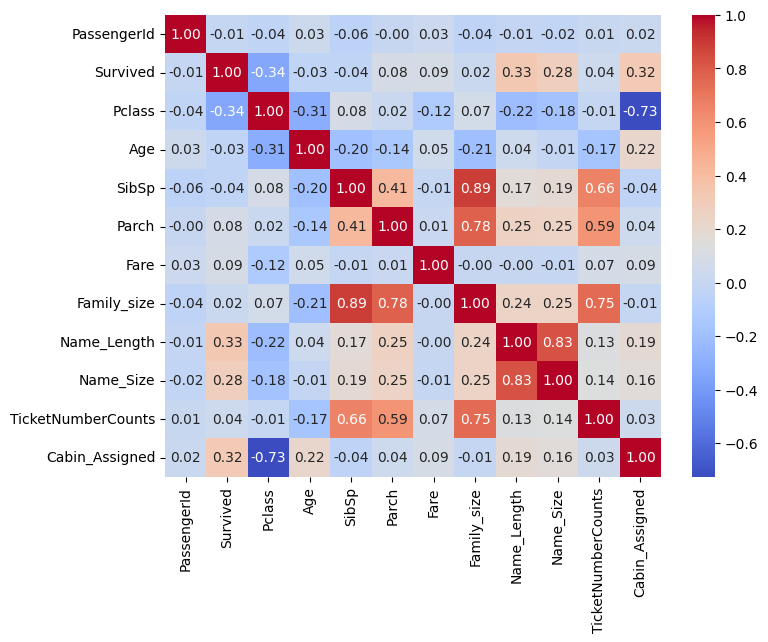

In [255]:
correlation_matrix = train_df.corr(numeric_only=True)

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f");

In [256]:
X = train_df.drop(['Survived', 'SibSp', 'Parch'], axis=1)
y = train_df['Survived']
X_test = test_df.drop(['Age_Cut', 'Fare_Cut', 'SibSp', 'Parch'], axis=1)

In [257]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, stratify = y, random_state=21)

In [258]:
ordinal_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

In [259]:
ohe_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot', OneHotEncoder(handle_unknown = 'ignore', sparse_output=False))
])

In [260]:
col_trans = ColumnTransformer(transformers=[
    ('impute', SI, ['Age']),
    ('ord_pipeline', ordinal_pipeline, ode_cols),
    ('ohe_pipeline', ohe_pipeline, ohe_cols),
   # ('passthrough', 'passthrough', ['Pclass', 'TicketNumberCounts', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare'])
     ('passthrough', 'passthrough', ['Pclass', 'Cabin_Assigned', 'Name_Size', 'Age', 'Fare', 'TicketNumberCounts'])
    ],
    remainder='drop',
    n_jobs=-1)

In [261]:
rfc = RandomForestClassifier()

In [262]:
param_grid = {
    'n_estimators': [150, 200, 300, 500],
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 13, 15, 17, 20],
    'min_samples_leaf': [2, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
}

In [263]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [264]:
pipefinalrfc = make_pipeline(col_trans, CV_rfc)
pipefinalrfc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 13, 15, 17, 20],
                                          'min_samples_leaf': [2, 4, 5, 6],
                                          'min_samples_split': [5, 10, 15],
                                          'n_estimators': [150, 200, 300,
                                                           500]}))])

In [265]:
print(CV_rfc.best_params_)
print(CV_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 2, 'min_samples_split': 15, 'n_estimators': 200}
0.8300502314586822


In [266]:
dtc = DecisionTreeClassifier()

In [267]:
param_grid = {
    'min_samples_split': [5, 10, 15],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

In [268]:
CV_dtc = GridSearchCV(estimator=dtc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [270]:
pipefinaldtc = make_pipeline(col_trans, CV_dtc)
pipefinaldtc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [10, 20, 30],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [5, 10, 15]}))])

In [271]:
print(CV_dtc.best_params_)
print(CV_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 15}
0.8118388653599922


In [272]:
knn = KNeighborsClassifier()

In [273]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
}

In [274]:
CV_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [275]:
pipefinalknn = make_pipeline(col_trans, CV_knn)
pipefinalknn.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=KNeighborsClassifier(),
                              param_grid={'algorithm': ['auto', 'ball_tree',
                                                        'kd_tree', 'brute'],
                                          'n_neighbors': [3, 5, 7, 9, 11],
                                          'p': [1, 2],
                                          'weights': ['uniform',
                                                      'distance']}))])

In [276]:
print(CV_knn.best_params_)
print(CV_knn.best_score_)

{'algorithm': 'auto', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.8061755146262188


In [277]:
svc = SVC(probability=True)

In [278]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
    'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
}

In [279]:
CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [280]:
pipefinalsvc = make_pipeline(col_trans, CV_svc)
pipefinalsvc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=SVC(probability=True),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001],
                                          'kernel': ['linear', 'poly', 'rbf',
                                                     'sigmoid']}))])

In [281]:
print(CV_svc.best_params_)
print(CV_svc.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8019698611247907


In [282]:
lr = LogisticRegression()

In [283]:
param_grid = {
    'C': [100,10, 1.0, 0.1, 0.001, 0.001],
}

In [284]:
CV_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [285]:
pipefinallr= make_pipeline(col_trans, CV_lr)
pipefinallr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=LogisticRegression(),
                              param_grid={'C': [100, 10, 1.0, 0.1, 0.001,
                                                0.001]}))])

In [286]:
print(CV_lr.best_params_)
print(CV_lr.best_score_)

{'C': 0.1}
0.8089924160346695


In [287]:
gnb = GaussianNB()

In [288]:
param_grid = {
    'var_smoothing': [0.00000001, 0.000000001, 0.00000001],
}

In [289]:
CV_gnb = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [290]:
pipefinalgnb= make_pipeline(col_trans, CV_gnb)
pipefinalgnb.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex', 'Embarked']),
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GaussianNB(),
                              param_grid={'var_smoothing': [1e-08, 1e-09,
                                                            1e-08]}))])

In [291]:
print(CV_gnb.best_params_)
print(CV_gnb.best_score_)

{'var_smoothing': 1e-08}
0.7710922879936964


In [297]:
xg = XGBClassifier()

In [294]:
param_grid = {
     'booster': ['gbtree', 'gblinear','dart'],
}

In [298]:
CV_xg = GridSearchCV(estimator=xg, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [299]:
pipefinalxg= make_pipeline(col_trans, CV_xg)
pipefinalxg.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...),
                              param_grid={'booster': ['gbtree', 'gblinear',
                                                      'dart']}))])

In [300]:
print(CV_xg.best_params_)
print(CV_xg.best_score_)

{'booster': 'gblinear'}
0.8019698611247907


In [303]:
abc = AdaBoostClassifier()

In [304]:
dtc_2 = DecisionTreeClassifier(criterion = 'entropy', max_depth=10,min_samples_leaf=4, min_samples_split=10)  
svc_2 = SVC(probability=True, C=10, kernel='rbf') 
lr_2 = LogisticRegression(C=0.1) 
lr_3 = LogisticRegression(C=0.2) 
lr_4 = LogisticRegression(C=0.05)

In [305]:
param_grid = {
    'estimator': [dtc_2, svc_2, lr_2], 
    'n_estimators':  [5, 10, 25, 50, 100],
    'algorithm': ['SAMME', 'SAMME.R'],
    'learning_rate': [(0.97 + x / 100) for x in range(1, 7)]  
}

In [306]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [307]:
pipefinalabc= make_pipeline(col_trans, CV_abc)
pipefinalabc.fit(X_train, y_train)

C:\Users\EVANS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\EVANS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\EVANS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent th

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=AdaBoostClassifier(),
                              param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                                          'estimator': [DecisionTreeClassifier(criterion='entropy',
                                                                               max_depth=10,
                                                                               min_samples_leaf=4,
                                                                               min_samples_split=10),
                                                        SVC(C=10,
                                                            probability=True),
                                                        LogisticRegression(C=0.1)],
                                          'learning_rate': [0.98, 0.99, 1.0,
                                                            1.01, 1.02, 1.03],
                                          'n_estimators': [5, 10, 25, 50,
                                                           100]}))])

In [308]:
print(CV_abc.best_params_)
print(CV_abc.best_score_)

{'algorithm': 'SAMME.R', 'estimator': DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10), 'learning_rate': 1.01, 'n_estimators': 100}
0.7977445090121146


In [311]:
etc = ExtraTreesClassifier()

In [312]:
param_grid = {
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "n_estimators" :[100,300],
}

In [313]:
CV_etc = GridSearchCV(estimator=etc, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [314]:
pipefinaletc= make_pipeline(col_trans, CV_etc)
pipefinaletc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                 ('passthrough', 'passthrough',
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=ExtraTreesClassifier(),
                              param_grid={'max_features': [1, 3, 10],
                                          'min_samples_leaf': [1, 3, 10],
                                          'min_samples_split': [2, 3, 10],
                                          'n_estimators': [100, 300]}))])

In [315]:
print(CV_etc.best_params_)
print(CV_etc.best_score_)

{'max_features': 1, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
0.8117994681374963


In [318]:
GBC = GradientBoostingClassifier()

In [319]:
param_grid = {
              'n_estimators' : [300, 400, 500],
              'learning_rate': [ 0.1, 0.3, 0.6, 1.0],
              'max_depth': [8, 10, 12],
              'min_samples_leaf': [50, 100, 120, 150],
              'max_features': [0.1, 0.3, 0.5] 
              }

In [320]:
CV_gbc = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=StratifiedKFold(n_splits=5))

In [321]:
pipefinalgbc= make_pipeline(col_trans, CV_gbc)
pipefinalgbc.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                              estimator=GradientBoostingClassifier(),
                              param_grid={'learning_rate': [0.1, 0.3, 0.6, 1.0],
                                          'max_depth': [8, 10, 12],
                                          'max_features': [0.1, 0.3, 0.5],
                                          'min_samples_leaf': [50, 100, 120,
                                                               150],
                                          'n_estimators': [300, 400, 500]}))])

In [322]:
print(CV_gbc.best_params_)
print(CV_gbc.best_score_)

{'learning_rate': 0.3, 'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 500}
0.8315177779966513


In [325]:
vc1 = VotingClassifier([('gbc', CV_gbc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

In [326]:
vc2 = VotingClassifier([('abc', CV_abc.best_estimator_),
                        ('etc', CV_etc.best_estimator_),
                          ('nb', CV_gnb.best_estimator_)
                         ], voting='hard', weights=[1,2,3] )

In [327]:
pipefinalcv1 = make_pipeline(col_trans, vc1)

In [328]:
pipefinalcv2 = make_pipeline(col_trans, vc2)

In [329]:
pipefinalcv1.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                  ['Pclass', 'Cabin_Assigned',
                                                   'Name_Size', 'Age', 'Fare',
                                                   'TicketNumberCounts'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('gbc',
                                               GradientBoostingClassifier(learning_rate=0.3,
                                                                          max_depth=10,
                                                                          max_features=0.3,
                                                                          min_samples_leaf=100,
                                                                          n_estimators=500)),
                                              ('etc',
                                               ExtraTreesClassifier(max_features=1,
                                                                    min_samples_leaf=3)),
                                              ('nb',
                                               GaussianNB(var_smoothing=1e-08))],
                                  weights=[1, 2, 3]))])

In [330]:
pipefinalcv2.fit(X_train, y_train)

C:\Users\EVANS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('impute',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['Age']),
                                                 ('ord_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Family_Size_Grouped']),
                                                 ('ohe_pipeline',
                                                  Pipeline(s...
                                                   'TicketNumberCounts'])])),
                ('votingclassifier',
                 VotingClassifier(estimators=[('abc',
                                               AdaBoostClassifier(estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                                   max_depth=10,
                                                                                                   min_samples_leaf=4,
                                                                                                   min_samples_split=10),
                                                                  learning_rate=1.01,
                                                                  n_estimators=100)),
                                              ('etc',
                                               ExtraTreesClassifier(max_features=1,
                                                                    min_samples_leaf=3)),
                                              ('nb',
                                               GaussianNB(var_smoothing=1e-08))],
                                  weights=[1, 2, 3]))])

In [331]:

Y_pred = pipefinalrfc.predict(X_test)
Y_pred2 = pipefinaldtc.predict(X_test)
Y_pred3 = pipefinalknn.predict(X_test)
Y_pred4 = pipefinalsvc.predict(X_test)
Y_pred5 = pipefinallr.predict(X_test)
Y_pred6 = pipefinalgnb.predict(X_test)
Y_pred7 = pipefinalxg.predict(X_test)
Y_pred8 = pipefinalabc.predict(X_test)
Y_pred9 = pipefinaletc.predict(X_test)
Y_pred10 = pipefinalgbc.predict(X_test)
Y_pred11 = pipefinalcv1.predict(X_test)
Y_pred12 = pipefinalcv2.predict(X_test)

In [332]:
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred
})

submission2 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred2
})

submission3 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred3
})

submission4 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred4
})

submission5 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred5
})

submission6 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred6
})

submission7 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred7
})

submission8 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred8
})

submission9 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred9
})

submission10 = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': Y_pred10
})

submission11 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred11
})

submission12 = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred12
})

In [335]:
submission.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission929_1.csv', index=False)
submission2.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission929_2.csv', index=False)
submission3.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission929_3.csv', index=False)
submission4.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission929_4.csv', index=False)
submission5.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission929_5.csv', index=False)
submission6.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission929_6.csv', index=False)
submission7.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission929_7.csv', index=False)
submission8.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission101_8.csv', index=False)
submission9.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission101_9.csv', index=False)
submission10.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission101_10.csv', index=False)
submission11.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission101_11.csv', index=False)
submission12.to_csv(r'C:\Users\EVANS\OneDrive\Desktop\python\submission101_12.csv', index=False)
